<a href="https://colab.research.google.com/github/BiancaClementino/DataScrappingCW/blob/master/coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analytics in Python II Coursework

Deadline: September 18th, 2019.

Review Session: 3pm, September 11th, 2019.

https://en.wikipedia.org/wiki/Glossary_of_tennis_terms

## Data Retrieval
*35 Marks*

### Information Profile 
*(15 marks)*

You should explain which source you have decided to extract data from. You should explain why you have decided to extract this data, whether there are alternatives to scraping, whether the site has any particular usage restrictions. If possible, you should discuss the provenance (origin) of the data on the site itself, and the site's history (you may find web.archive.org useful to track a website's development). You should also discuss if anyone has extracted data from the website for use in visualisations previously. 

### Web Scraping Tools 
*(5 marks)*

Please provide an introduction to the tools (modules, libraries, frameworks) used to extract information from an external source. Please also suggest resources that you have used to obtain information about the tools (this can include documentation, tutorials, websites, question threads). You should format links using Markdown and sensible titles.

Suggestions include *Beautiful Soup*, *Scrapy*.

### Web Scraping Code 
*(15 marks)*

The code used to extract information from a website or set of websites. You might also choose to further transform the data extracted from the website in order to make it more useful for analysis.

**Initial approach**

In [0]:
#import requests
#import json
#from bs4 import BeautifulSoup

#page = requests.get("https://www.wtatennis.com/gs-scores/2019/4")
#soup = BeautifulSoup(json.loads(page.content)[u'html'], 'html.parser')


In [0]:
#print(soup.prettify())

In [0]:
#soup.find("div",class_="singles-items" ).get_text()

In [0]:
#print(soup.find("tr",class_="white" ).get_text())

In [0]:
#content=soup.find("div",class_="singles-items")
#content

In [0]:
#rows=content.find_all("tr")

In [0]:
#filtering
#"Serena" in rows[0].get_text()

In [0]:
#serena = [line for line in rows if "Serena" in line.get_text()]
#serena

In [0]:
#def filterByName (name):
  #return [line for line in rows if name in line.get_text()]

In [0]:
#Naomi=filterByName("Naomi")

In [0]:
#Gauff=filterByName("Gauff")
#for i in Gauff:
 # print(i.get_text())

**Another take to tackle the issue of players changing sides**

In [0]:
#match1Stat=[]
#for i in matchStats.find_all("td"):
#td is the main content part of the paage. It holds all the stats for each player 
  #print(i.get_text())
 # match1Stat.append(i.get_text())
#here I am reusing this line of code from earlier. It extracts the name of the players.
#leftPlayer = soup1.find(class_="home_t").get_text()
#rightPlayer = soup1.find(class_="away_t").get_text()
#Here I am cleaning up the data
#match1Stats = [i.get_text() for i in matchStats.find_all("td") if u"\xa0" not in i.get_text()]
#match1Stats

NameError: ignored

In [0]:
#Creating a dictionary which will store the data that I will extract from the HTML
#This will facilitate the process of moving the data into a panda's dataframe
#data1 = {'left':[],'right':[],'name':[]}
#for i, stat in enumerate(match1Stats[1:]):
 
  #if (i-1) % 3 == 0:
   # data1['name'].append(stat)
  #elif (i) % 3==0 :
   # data1['left'].append(stat)
  #elif (i+1) % 3 ==0:
 #   data1['right'].append(stat)
#data1

# listMatchObject= []

# for i in range(len(object['name'])):
#   matchObject = {'name':object['name'][i],leftPlayer:object['left'][i],rightPlayer:object['right'][i]}
#   listMatchObject.append(matchObject)
  
  
# for j in listMatchObject:
#   print(j)

In [0]:
#import pandas as pd
#using the data dictionary previously created to populate the columns of the new dataframe
#stat = data1["name"]
#left = data1["left"]
#right = data1["right"]
# print(len(left),len(right),len(stat))


#creating another dictionary which will be used to name the headers of the dataframe.
#d = {"Match Statistics":stat}
#here I am creating the left and right key which represent the players and the values will be based on the values held by the "leftPlayer" and "rightPlayer"
#d[leftPlayer] = left
#d[rightPlayer] = right


#match1table = pd.DataFrame(d)
#print(d.keys())

This method of naming the headers and populating the dataframe is more efficient and it should work for any type of data that we gather from this page.

This also means that this code can be used for any other wimbledon matches if not other Grand Slams (depending if the other Grand Slam's HTML behave the same way)

In [0]:
#match1table=match1table.set_index("Match Statistics")

In [0]:
match1table

### **FINAL: Building the URL for the Stats Page of each of Serena's Match**

In this section I am building the code that will automate the scraping from different URLs. This mean that I had to automate the building of each new link

In [0]:
import requests
import json
from bs4 import BeautifulSoup
page = requests.get("https://www.scorespro.com/tennis/wta-singles/wimbledon-england/results")
soup = BeautifulSoup(open("a.html","r").read(), 'html.parser')


In [0]:
#this section of the HTML is where you can find each match row in the UI. 
tbody = soup.find_all("tbody")


In [0]:
#Here I am filtering the search so it only looks for the matches that Serena played
serenaDate=[]

#looping through the 128 tbody's and checking which ones have William S. in it
for i in tbody:
  data = i.get_text()
  if "Williams S." in data:
    print(i.get_text())
#appending the results to a list which holds the filtered data
    serenaDate.append(i)

13.07.19  16:10FT   Williams S.USA 0 2 2 - - -16     Halep S.ROU 2 6 6 - - - 
11.07.19  17:00FT   Williams S. (11)USA 2 6 6 - - -15     Strycova B.CZE 0 1 2 - - - 
09.07.19  15:10FT   Riske A.USA 1 4 6 3 - -29     Williams S. (11)USA 2 6 4 6 - - 
08.07.19  15:10FT   Williams S. (11)USA 2 6 6 - - -16     Suarez N. C. (30)ESP 0 2 2 - - - 
06.07.19  15:10FT   Williams S. (11)USA 2 6 6 - - -19     Goerges J. (18)GER 0 3 4 - - - 
04.07.19  18:50FT   Williams S. (11)USA 2 2 6 6 - -26     Kaja Juvan (q)SLO 1 6 2 4 - - 
02.07.19  18:55FT   Williams S. (11)USA 2 6 7 - - -20     Giulia Gatto-Monticone (q)ITA 0 2 5 - - - 


In [0]:
URLbuild=[]
for serenaMatch in serenaDate:
  matchDictionary = {
      "date":serenaMatch.find(class_="kick_t_dt").get_text(),
  "homeTeam":serenaMatch.find("td", class_=["hometeam ","hometeam winteam"]).a.get_text().strip(),
  "awayTeam":serenaMatch.find("td", class_=["awayteam ","awayteam winteam"]).a.get_text().strip(),   
  }
  matchDictionary['link']=(matchDictionary['homeTeam']+"-vs-"+matchDictionary['awayTeam']).replace(' ', '-').replace('.','').lower()+"/"+matchDictionary["date"].strip().replace(".","-")[:-2]+"2019"
  URLbuild.append(matchDictionary)

the code is not working for the last link because this link is written incorrectly. The game was played on the 2nd however the link is saying that it was played on the 1st. This means that the UI is not matching the link which goes against what I built.

I will manually change this link.

In [0]:
URLbuild[-1]["link"]=URLbuild[-1]["link"].replace("02","01")

In [0]:
urls=[]

for i in URLbuild:
  url = 'https://www.scorespro.com/tennis/livescore/{0}/'.format(i["link"])
  urls.append(url)
print(urls)

['https://www.scorespro.com/tennis/livescore/williams-s-vs-halep-s/13-07-2019/', 'https://www.scorespro.com/tennis/livescore/williams-s-vs-strycova-b/11-07-2019/', 'https://www.scorespro.com/tennis/livescore/riske-a-vs-williams-s/09-07-2019/', 'https://www.scorespro.com/tennis/livescore/williams-s-vs-suarez-n-c/08-07-2019/', 'https://www.scorespro.com/tennis/livescore/williams-s-vs-goerges-j/06-07-2019/', 'https://www.scorespro.com/tennis/livescore/williams-s-vs-kaja-juvan/04-07-2019/', 'https://www.scorespro.com/tennis/livescore/williams-s-vs-giulia-gatto-monticone/01-07-2019/']


### **Creating my function to scrape Serena's matches**

In [0]:
import requests
import json
from bs4 import BeautifulSoup
page = requests.get("https://www.scorespro.com/tennis/livescore/williams-s-vs-halep-s/13-07-2019/")
soup = BeautifulSoup(page.content,'html.parser')
#soup

In [0]:
# soup.find_all("table",class_="goalpop_rd")[-2].find_all("tr")
# for i in soup.find_all("table",class_="goalpop_rd")[-2].find_all("tr")[3:]:
#   for j in i.find_all(class_="bcen")[1]:
#     print(j)

In [0]:
import pandas as pd
from random import randint
import time 
matchtables=[]

def getHTML(): 
  '''def Scrape is looping through the URL list which contains all the links that I have constructure and it is storing the HTML into a list called matchStats'''
  for link in urls:
    response= requests.get(link)
    html = BeautifulSoup(response.content, 'html.parser')
    print(html.head.title)
    sleepTime=randint(3,7)
    print('waiting',sleepTime,'seconds')
    time.sleep(sleepTime)
    grabSortData(html)

def grabSortData(html):
  
  data= {'left':[],'right':[],'name':[]}
  tablerows=[i.get_text() for i in html.find_all("table",class_="goalpop_rd")[-1].find_all("td") if u"\xa0" not in i.get_text()]
  for e, stat in enumerate(tablerows[1:]):
    if (e-1) % 3 == 0:
      data['name'].append(stat)
    elif (e) % 3==0 :
      data['left'].append(stat)
    elif (e+1) % 3 ==0:
      data['right'].append(stat)
  print(data)
  getPlayerName(html,data)

#def scrapeName is appending the names of the players into match1Stat. 
def getPlayerName(html,data):   

  leftPlayer = html.find("td",class_="home_t").get_text()
  rightPlayer = html.find("td", class_="away_t").get_text()  
  data['name'].insert(0,"Match Statistics")
  data['left'].insert(0,leftPlayer)
  data['right'].insert(0,rightPlayer)
#   header = {"Match Statistics":stat}
#   header[leftPlayer] = left
#   header[rightPlayer] = right 
  print(data)
  buildDF(data)
#     return data

def buildDF(data):
#   stat = data["name"]
#   left = data["left"]
#   right = data["right"]
  
  matchtable = pd.DataFrame(data)
  matchtable.columns=matchtable.iloc[0]
  matchtable=matchtable.drop(matchtable.index[0])
  matchtable=matchtable.set_index("Match Statistics")
  #match1table=match1table.set_index("Match Statistics")
  matchtables.append(matchtable)
  print(len(matchtables))

getHTML()


  
    
  
  


<title>Williams S. vs Halep S. Tennis Results | 13 Jul 2019</title>
waiting 3 seconds
{'left': ['6', '68', '19', '6', '5', '2', '1', '0', '1', '26', '8', '55', '32', '15', '42', '24', '17'], 'right': ['13', '74', '26', '7', '4', '1', '1', '4', '0', '45', '7', '72', '32', '11', '58', '1', '13'], 'name': ['1st Return Points Won', '1st Serve Percentage', '1st Serve Points Won', '2nd Return Points Won', '2nd Serve Points Won', 'Aces', 'Break Points Saved', 'Break Points Won', 'Double Faults', 'Return Points Won Percentage', 'Service Games', 'Service Points Won Percentage', 'Total 1st Serve Points', 'Total 2nd Serve Points', 'Total Points Won Percentage', 'Unforced Errors', 'Winners']}
{'left': ['Williams S.', '6', '68', '19', '6', '5', '2', '1', '0', '1', '26', '8', '55', '32', '15', '42', '24', '17'], 'right': ['Halep S.', '13', '74', '26', '7', '4', '1', '1', '4', '0', '45', '7', '72', '32', '11', '58', '1', '13'], 'name': ['Match Statistics', '1st Return Points Won', '1st Serve Percenta

In [0]:
williamsHalep=matchtables[0]
williamsStrycova=matchtables[1]
williamsRiske=matchtables[2]
williamsSuarez=matchtables[3]
williamsGeorges=matchtables[4]
williamsKaja=matchtables[5]
williamsGiulia=matchtables[6]

In [0]:
williamsHalep.to_excel("williamsHalep.xlsx")
williamsStrycova.to_excel("williamsStrycova.xlsx")
williamsRiske.to_excel("williamsRiske.xlsx")
williamsSuarez.to_excel("williamsSuarez.xlsx")
williamsGeorges.to_excel("williamsGeorges.xlsx")
williamsKaja.to_excel("williamsKaja.xlsx")
williamsGiulia.to_excel("williamsGiulia.xlsx")


In [0]:
williamsHalep.head()

,Williams S.,Halep S.
Match Statistics,,
1st Return Points Won,6,13
1st Serve Percentage,68,74
1st Serve Points Won,19,26
2nd Return Points Won,6,7
2nd Serve Points Won,5,4


### **Building the URL for the Stats Page of each of Coco's Match**

In this section I am building the code that will automate the scraping from different URLs. This mean that I had to automate the building of each new link

In [0]:
import requests
import json
from bs4 import BeautifulSoup
page3 = requests.get("https://www.scorespro.com/tennis/wta-singles/wimbledon-england/results")
soup3 = BeautifulSoup(open("a.html","r").read(), 'html.parser')
#soup3

In [0]:
#this section of the HTML is where you can find each match row in the UI. 
tbody = soup3.find_all("tbody")
#tbody

In [0]:
#Here I am filtering the search so it only looks for the matches that Coco played
cocoDate=[]

#looping through the 128 tbody's and checking which ones have William S. in it
for i in tbody:
  cocodata = i.get_text()
  if "Gauff C." in cocodata:
    print(i.get_text())
#appending the results to a list which holds the filtered data
    cocoDate.append(i)

08.07.19  16:30FT   Halep S. (7)ROU 2 6 6 - - -18     Gauff C. (q)USA 0 3 3 - - - 
05.07.19  19:25FT   Hercog P.SLO 1 6 67 5 - -34     Gauff C. (q)USA 2 3 79 7 - - 
03.07.19  22:10FT   Gauff C. (q)USA 2 6 6 - - -18     Rybarikova M (alt)SVK 0 3 3 - - - 
01.07.19  20:05FT   Williams V.USA 0 4 4 - - -20     Gauff C. (q)USA 2 6 6 - - - 


In [0]:
cocoURLbuild=[]
for cocoMatch in cocoDate:
  CocomatchDictionary = {
      "date":cocoMatch.find(class_="kick_t_dt").get_text(),
  "homeTeam":cocoMatch.find("td", class_=["hometeam ","hometeam winteam"]).a.get_text().strip(),
  "awayTeam":cocoMatch.find("td", class_=["awayteam ","awayteam winteam"]).a.get_text().strip(),   
  }
  CocomatchDictionary['link']=(CocomatchDictionary['homeTeam']+"-vs-"+CocomatchDictionary['awayTeam']).replace(' ', '-').replace('.','').lower()+"/"+CocomatchDictionary["date"].strip().replace(".","-")[:-2]+"2019"
  cocoURLbuild.append(CocomatchDictionary)

In [0]:
cocoURLbuild[0]["link"]=cocoURLbuild[0]["link"].replace("08","06")

In [0]:
cocourls=[]

for i in cocoURLbuild:
  cocourl = 'https://www.scorespro.com/tennis/livescore/{0}/'.format(i["link"])
  cocourls.append(cocourl)
print(cocourls)

['https://www.scorespro.com/tennis/livescore/halep-s-vs-gauff-c/06-07-2019/', 'https://www.scorespro.com/tennis/livescore/hercog-p-vs-gauff-c/05-07-2019/', 'https://www.scorespro.com/tennis/livescore/gauff-c-vs-rybarikova-m/03-07-2019/', 'https://www.scorespro.com/tennis/livescore/williams-v-vs-gauff-c/01-07-2019/']


### **Creating my function to scrape Coco's matches**

In [0]:
import pandas as pd
from random import randint
import time 
Cocomatchtables=[]

def getHTML(): 
  '''def Scrape is looping through the URL list which contains all the links that I have constructure and it is storing the HTML into a list called matchStats'''
  for link in cocourls:
    response= requests.get(link)
    html = BeautifulSoup(response.content, 'html.parser')
    print(html.head.title)
    sleepTime=randint(3,7)
    print('waiting',sleepTime,'seconds')
    time.sleep(sleepTime)
    grabSortData(html)

def grabSortData(html):
  
  data= {'left':[],'right':[],'name':[]}
  tablerows=[i.get_text() for i in html.find_all("table",class_="goalpop_rd")[-1].find_all("td") if u"\xa0" not in i.get_text()]
  for e, stat in enumerate(tablerows[1:]):
    if (e-1) % 3 == 0:
      data['name'].append(stat)
    elif (e) % 3==0 :
      data['left'].append(stat)
    elif (e+1) % 3 ==0:
      data['right'].append(stat)
  print(data)
  getPlayerName(html,data)

#def scrapeName is appending the names of the players into match1Stat. 
def getPlayerName(html,data):   

  leftPlayer = html.find("td",class_="home_t").get_text()
  rightPlayer = html.find("td", class_="away_t").get_text()  
  data['name'].insert(0,"Match Statistics")
  data['left'].insert(0,leftPlayer)
  data['right'].insert(0,rightPlayer)
#   header = {"Match Statistics":stat}
#   header[leftPlayer] = left
#   header[rightPlayer] = right 
  print(data)
  buildDF(data)
#     return data

def buildDF(data):
#   stat = data["name"]
#   left = data["left"]
#   right = data["right"]
  
  Cocomatchtable = pd.DataFrame(data)
  Cocomatchtable.columns=Cocomatchtable.iloc[0]
  Cocomatchtable=Cocomatchtable.drop(Cocomatchtable.index[0])
  Cocomatchtable=Cocomatchtable.set_index("Match Statistics")
  #match1table=match1table.set_index("Match Statistics")
  Cocomatchtables.append(Cocomatchtable)
  print(len(Cocomatchtables))

getHTML()


  
    
  
  


<title>Halep S. vs Gauff C. Tennis Results | 08 Jul 2019</title>
waiting 6 seconds
{'left': ['19', '57', '25', '12', '11', '2', '4', '5', '5', '52', '9', '62', '33', '25', '57', '14', '17'], 'right': ['8', '66', '21', '9', '8', '0', '7', '2', '1', '38', '9', '48', '40', '21', '43', '29', '15'], 'name': ['1st Return Points Won', '1st Serve Percentage', '1st Serve Points Won', '2nd Return Points Won', '2nd Serve Points Won', 'Aces', 'Break Points Saved', 'Break Points Won', 'Double Faults', 'Return Points Won Percentage', 'Service Games', 'Service Points Won Percentage', 'Total 1st Serve Points', 'Total 2nd Serve Points', 'Total Points Won Percentage', 'Unforced Errors', 'Winners']}
{'left': ['Halep S.', '19', '57', '25', '12', '11', '2', '4', '5', '5', '52', '9', '62', '33', '25', '57', '14', '17'], 'right': ['Gauff C.', '8', '66', '21', '9', '8', '0', '7', '2', '1', '38', '9', '48', '40', '21', '43', '29', '15'], 'name': ['Match Statistics', '1st Return Points Won', '1st Serve Percenta

In [0]:
gauffHalep=Cocomatchtables[0]
gauffHercog=Cocomatchtables[1]
gauffRybarikova=Cocomatchtables[2]
gauffWilliams=Cocomatchtables[3]

In [0]:
gauffHalep.head(100)

,Halep S.,Gauff C.
Match Statistics,,
1st Return Points Won,19,8
1st Serve Percentage,57,66
1st Serve Points Won,25,21
2nd Return Points Won,12,9
2nd Serve Points Won,11,8
Aces,2,0
Break Points Saved,4,7
Break Points Won,5,2
Double Faults,5,1


In [0]:
gauffHalep.to_excel("gauffHalep.xlsx")
gauffHercog.to_excel("gauffHercog.xlsx")
gauffRybarikova.to_excel("gauffRybarikova.xlsx")
gauffWilliams.to_excel("gauffWilliams.xlsx")



# Data Analysis and Adjustment
*30 Marks*

### Data Analysis and Adjustment Tools *(5 marks)*

​
Please provide an introduction to the tools (modules, libraries, frameworks) used to understand data, analyse it and/or prepare it for further analysis. Please also suggest resources that you have used to obtain information about the tools (this can include documentation, tutorials, websites, question threads). You should format links using Markdown and sensible titles.
​
Suggestions include *NumPy*, *SciPy*, *Scikit Learn*, *Pandas*



For this section of the coursework I have used Numpy which is a mathematiccal ppython liubrary which allows me to perform many basic but also complex statistical analysis such as the mean, standard deviation and much more. https://numpy.org/devdocs/

Throughout the whole coursework I have also been using pandas which has allowed me to manipulate my data for easier analysis. https://pandas.pydata.org/pandas-docs/stable/

To perform analysis on sports we have to be able to understand the importance of each matrix on the athelet's performance and how a decrease or increase in a matrix will affect the score, hence, I had also to read around the sport and look at past basic analysis which would help guide my own analysis. 
These articles have helped me choose which matrix I should be analysing with the data that I have available. Looking at the official stats carried out by Wimbledon is also a great way to see how expert study the game.

1. https://www.wimbledon.com/en_GB/scores/stats/2701.html

2. https://bleacherreport.com/articles/1733332-the-five-most-important-statistics-in-womens-tennis

3. http://baseline.tennis.com/article/76923/return-biggest-part-game-serena-williams

4. http://www.tennisviewmag.com/tennis-view-magazine/article/tennis-statistics-objective-analysis

5. https://www.braingametennis.com/saving-break-points-1st-serve-v-2nd-serve/

6. https://www.collinsdictionary.com/word-lists/tennis-tennis-terms

### Data Analysis and Adjustment Code *(15 marks)*
Please use one or two of the aforementioned tools to prepare, adjust or numerically analyse the information obtained in the first stage. You may choose to practice on a pre-existing dataset; in exceptional circumstances if the first or second stage does not produce satisfactory results, you may choose to adjust or analyse an alternative, preprepared dataset.

In [0]:
import numpy as np

# Serena Analysis

### Data cleaning and formating

 Creating a dataset with all the matches so it is easier to analyse

---

I then created filtered tables to allow me to look at only Serena's and Coco's stats without having the opponents columns.

In [0]:
SerenaWilliams= pd.concat([williamsHalep, williamsStrycova, williamsRiske,williamsSuarez,williamsGeorges,williamsKaja, williamsGiulia], axis=1)
SerenaWilliamsStats=SerenaWilliams['Williams S.']
SerenaWilliamsStats

,Williams S.,Williams S.,Williams S.,Williams S.,Williams S.,Williams S.,Williams S.
Match Statistics,,,,,,,
1st Return Points Won,6,12,24,16,5,21,19
1st Serve Percentage,68,61,58,61,71,54,65
1st Serve Points Won,19,24,34,21,31,30,25
2nd Return Points Won,6,8,12,13,15,10,13
2nd Serve Points Won,5,9,20,8,12,17,11
Aces,2,4,19,2,7,6,7
Break Points Saved,1,3,0,2,0,0,2
Break Points Won,0,4,6,5,1,4,5
Double Faults,1,1,2,0,0,5,2


All of Serena's stats were under the same named columns which would cause issues in future analysis so here I am renaning the columns for better reference.

In [0]:
SerenaWilliamsStats.columns = ["Williams S.Final", "Williams S.SF", "Williams S.QF", "Williams S.R4", "Williams S.R3", "Williams S.R2", "Williams S.R1"]
SerenaWilliamsStats

,Williams S.Final,Williams S.SF,Williams S.QF,Williams S.R4,Williams S.R3,Williams S.R2,Williams S.R1
Match Statistics,,,,,,,
1st Return Points Won,6,12,24,16,5,21,19
1st Serve Percentage,68,61,58,61,71,54,65
1st Serve Points Won,19,24,34,21,31,30,25
2nd Return Points Won,6,8,12,13,15,10,13
2nd Serve Points Won,5,9,20,8,12,17,11
Aces,2,4,19,2,7,6,7
Break Points Saved,1,3,0,2,0,0,2
Break Points Won,0,4,6,5,1,4,5
Double Faults,1,1,2,0,0,5,2


Here I am separating her winning matches from her loosing match because later on I will be calculating some averages in which I don't want her loosing match to be involved in.

In [0]:
serenaWins=SerenaWilliamsStats.iloc[:,1:7]
serenaWins

,Williams S.SF,Williams S.QF,Williams S.R4,Williams S.R3,Williams S.R2,Williams S.R1
Match Statistics,,,,,,
1st Return Points Won,12,24,16,5,21,19
1st Serve Percentage,61,58,61,71,54,65
1st Serve Points Won,24,34,21,31,30,25
2nd Return Points Won,8,12,13,15,10,13
2nd Serve Points Won,9,20,8,12,17,11
Aces,4,19,2,7,6,7
Break Points Saved,3,0,2,0,0,2
Break Points Won,4,6,5,1,4,5
Double Faults,1,2,0,0,5,2


In [0]:
serenaloss=SerenaWilliamsStats['Williams S.Final']

Putting her Final match into its own dataset to carry out percentage change analysis

In [0]:
Serenaopponents=SerenaWilliams.drop("Williams S.", axis=1)


Have to change all datasets to integers as Numpy does not work with floats

In [0]:
serenaloss=serenaloss.astype('float16')

In [0]:
Serenaopponents=Serenaopponents.astype('float16')

In [0]:
SerenaWilliamsStats=SerenaWilliamsStats.astype('float16')

In [0]:
serenaWins=serenaWins.astype('float16')

### Mean and Mean Comparison calculations

Here we are analysing each of the matrix by working out the mean which does not include her loosing match. This will allow me to compare her loosing match stats to her averages. We can then see a trend and hopefully figure out what drove her game down.

In [0]:
serenaWins.mean(axis=1)

Match Statistics
1st Return Points Won            16.171875
1st Serve Percentage             61.656250
1st Serve Points Won             27.500000
2nd Return Points Won            11.835938
2nd Serve Points Won             12.835938
Aces                              7.500000
Break Points Saved                1.166992
Break Points Won                  4.167969
Double Faults                     1.666992
Return Points Won Percentage     46.500000
Service Games                    10.664062
Service Points Won Percentage    67.312500
Total 1st Serve Points           37.156250
Total 2nd Serve Points           23.671875
Total Points Won Percentage      56.843750
Unforced Errors                  20.000000
Winners                          27.828125
dtype: float16

calculating the percentage difference between her last game and her average stats. This will help me figure out which stats are critical for a sucessfull game

In [0]:
SerenapercentageChange = []
for i in range(len(serenaloss)):
  SerenapercentageChange.extend(np.subtract(serenaloss.iloc[[i]],serenaWins.iloc[[i]].mean(axis=1)) / serenaWins.iloc[[i]].mean(axis=1) * 100)
 

In [0]:
SerenapercentageChange

[-62.875,
 10.2890625,
 -30.90625,
 -49.3125,
 -61.03125,
 -73.3125,
 -14.3046875,
 -100.0,
 -40.0,
 -44.09375,
 -24.96875,
 -18.28125,
 -13.8828125,
 -36.65625,
 -26.125,
 20.0,
 -38.90625]

When we analyse her defense, we can see that she has worsen in 2 of the 3 main defense strategies. Her Return Point Won values for both 1st and 2nd serve have decreased, 62% and 49% respectively. This means that she was not able to keep up with many of the return balls from her opponent in her final. This is a driving force for an unsuccseful game because it is allowing for the opponent to increase the win margin and moreover, increasing the opportunities to win break points which are also crucial.

Secondly her Break Points Won also took a massive hit (100% decrease). She was not able to win any break points which means that her opponent was able to win all of her games. This decreases massivly the chance to win sets which consequently decreases the chance of a victorious match. 

Other interesting observations include the a positive decrease in double faults. Double Faults occur when the server has failed both serves which results in a double fault to the server and a point to the receiver. A decrease in this means that Serena is not giving away points that could be potential serve points, break points or aces which are also good winners. 

Her Total Point Won percentage was also 26% below her average which basically tells us that this was definitely not a good match.

### Return Points Won percentage calculation

---

Calculation : return points won / opponent's total serve points * 100

In [0]:
SerenaWilliamsStats

,Williams S.Final,Williams S.SF,Williams S.QF,Williams S.R4,Williams S.R3,Williams S.R2,Williams S.R1
Match Statistics,,,,,,,
1st Return Points Won,6.0,12.0,24.0,16.0,5.0,21.0,19.0
1st Serve Percentage,68.0,61.0,58.0,61.0,71.0,54.0,65.0
1st Serve Points Won,19.0,24.0,34.0,21.0,31.0,30.0,25.0
2nd Return Points Won,6.0,8.0,12.0,13.0,15.0,10.0,13.0
2nd Serve Points Won,5.0,9.0,20.0,8.0,12.0,17.0,11.0
Aces,2.0,4.0,19.0,2.0,7.0,6.0,7.0
Break Points Saved,1.0,3.0,0.0,2.0,0.0,0.0,2.0
Break Points Won,0.0,4.0,6.0,5.0,1.0,4.0,5.0
Double Faults,1.0,1.0,2.0,0.0,0.0,5.0,2.0


In [0]:
Serenafirstreturnpointspercentage =np.divide(SerenaWilliamsStats.iloc[[0]],Serenaopponents.iloc[[12]]) * 100

In [0]:
Serenafirstreturnpointspercentage

,Williams S.Final,Williams S.SF,Williams S.QF,Williams S.R4,Williams S.R3,Williams S.R2,Williams S.R1
Match Statistics,,,,,,,
1st Return Points Won,18.75,48.0,41.375,44.4375,17.234375,39.625,47.5


In [0]:
Serenasecondreturnpointspercentage = np.divide(SerenaWilliamsStats.iloc[[3]],Serenaopponents.iloc[[13]]) * 100

In [0]:
Serenasecondreturnpointspercentage

,Williams S.Final,Williams S.SF,Williams S.QF,Williams S.R4,Williams S.R3,Williams S.R2,Williams S.R1
Match Statistics,,,,,,,
2nd Return Points Won,54.53125,50.0,34.28125,56.53125,53.5625,34.46875,44.8125


There is a massive difference between Serena's final match return point stats compared to her winning matches, her Round 3 being an anomaly in this trend. Being able to keep the percentage near or above the 50% mark is a great way to estable control over the game. 

### Break Point Conversion Calculation

In [0]:
SerenaWilliamsStats

,Williams S.Final,Williams S.SF,Williams S.QF,Williams S.R4,Williams S.R3,Williams S.R2,Williams S.R1
Match Statistics,,,,,,,
1st Return Points Won,6.0,12.0,24.0,16.0,5.0,21.0,19.0
1st Serve Percentage,68.0,61.0,58.0,61.0,71.0,54.0,65.0
1st Serve Points Won,19.0,24.0,34.0,21.0,31.0,30.0,25.0
2nd Return Points Won,6.0,8.0,12.0,13.0,15.0,10.0,13.0
2nd Serve Points Won,5.0,9.0,20.0,8.0,12.0,17.0,11.0
Aces,2.0,4.0,19.0,2.0,7.0,6.0,7.0
Break Points Saved,1.0,3.0,0.0,2.0,0.0,0.0,2.0
Break Points Won,0.0,4.0,6.0,5.0,1.0,4.0,5.0
Double Faults,1.0,1.0,2.0,0.0,0.0,5.0,2.0


In [0]:
SerenaWilliamsStats.iloc[[7]]

,Williams S.Final,Williams S.SF,Williams S.QF,Williams S.R4,Williams S.R3,Williams S.R2,Williams S.R1
Match Statistics,,,,,,,
Break Points Won,0.0,4.0,6.0,5.0,1.0,4.0,5.0


In [0]:
SerenaBP=np.add(SerenaWilliamsStats.iloc[[7]],Serenaopponents.iloc[[6]])

In [0]:
SerenaBP

,Williams S.Final,Williams S.SF,Williams S.QF,Williams S.R4,Williams S.R3,Williams S.R2,Williams S.R1
Match Statistics,,,,,,,
Break Points Won,1.0,5.0,16.0,11.0,6.0,10.0,10.0


In [0]:
SerenaopponentBP=np.add(Serenaopponents.iloc[[7]],SerenaWilliamsStats.iloc[[6]])

In [0]:
SerenaopponentBP

,Halep S.,Strycova B.,Riske A.,Suarez N. C.,Goerges J.,Kaja Juvan,Giulia Gatto-Monticone
Match Statistics,,,,,,,
Break Points Won,5.0,3.0,5.0,3.0,0.0,3.0,4.0


This is the Break Point Conversion which shows how many break points opportunities they were able to turn into points. Keeping this at a high level pressures the opponent's serves which radically shapes the match.

In [0]:
SerenaBPConversion=np.divide(SerenaWilliamsStats.iloc[[7]],SerenaBP)*100

In [0]:
SerenaBPConversion

,Williams S.Final,Williams S.SF,Williams S.QF,Williams S.R4,Williams S.R3,Williams S.R2,Williams S.R1
Match Statistics,,,,,,,
Break Points Won,0.0,80.0,37.5,45.46875,16.65625,40.0,50.0


In [0]:
SerenaopponentBPConversion=np.divide(Serenaopponents.iloc[[7]],SerenaopponentBP)*100

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [0]:
SerenaopponentBPConversion

,Halep S.,Strycova B.,Riske A.,Suarez N. C.,Goerges J.,Kaja Juvan,Giulia Gatto-Monticone
Match Statistics,,,,,,,
Break Points Won,80.0,0.0,100.0,33.3125,NaN,100.0,50.0


We can see that in this tournament, Serena had very fuctluated results. We can see that the matches in which she was not able to achieve 50% conversion are the same matches in which she has lost 1 game, with the game against Georges being an anomaly. This one shows that having a low conversion doesnt necessarily mean that you will not win the match. She had 6 break points compared to her opponent ( 0 ) which shows that Serena was able to drive her opponent to the breaking point however her opponent was able to save a lot. 

From this I can conclude that keeping conversion high (45%+) and BP opportunities for the opponent low can help in the chances of having a sucessful match.

# Coco Analysis

### Data Cleaning and Formating

In [0]:
CocoGauff = pd.concat([gauffHalep, gauffHercog, gauffRybarikova,gauffWilliams], axis=1)
CocoGauffStats=CocoGauff['Gauff C.']


In [0]:
CocoGauffStats.columns = ["Gauff C. R4", "Gauff C. R3", "Gauff C. R2", "Gauff C. R1"]


In [0]:
Cocoloss=CocoGauffStats['Gauff C. R4']


In [0]:
CocoOpponents=CocoGauff.drop("Gauff C.", axis=1)

In [0]:
cocoWins=CocoGauffStats.iloc[:,1:5]


In [0]:
CocoGauffStats=CocoGauffStats.astype('float16')
Cocoloss=Cocoloss.astype('float16')
cocoWins=cocoWins.astype('float16')
CocoOpponents=CocoOpponents.astype('float16')

### Mean and Mean Comparison calculations

In [0]:
cocoWins.mean(axis=1)

Match Statistics
1st Return Points Won            11.335938
1st Serve Percentage             68.687500
1st Serve Points Won             36.656250
2nd Return Points Won            12.000000
2nd Serve Points Won             12.000000
Aces                              2.666016
Break Points Saved                2.000000
Break Points Won                  3.000000
Double Faults                     4.667969
Return Points Won Percentage     39.000000
Service Games                    12.000000
Service Points Won Percentage    68.687500
Total 1st Serve Points           49.656250
Total 2nd Serve Points           22.328125
Total Points Won Percentage      54.656250
Unforced Errors                  20.328125
Winners                          20.000000
dtype: float16

In [0]:
CocopercentageChange = []
for i in range(len(Cocoloss)):
  CocopercentageChange.extend(np.subtract(Cocoloss.iloc[[i]],cocoWins.iloc[[i]].mean(axis=1)) / cocoWins.iloc[[i]].mean(axis=1) * 100)


In [0]:
CocopercentageChange

[-29.421875,
 -3.912109375,
 -42.6875,
 -25.0,
 -33.3125,
 -100.0,
 250.0,
 -33.3125,
 -78.5625,
 -2.5625,
 -25.0,
 -30.125,
 -19.453125,
 -5.94921875,
 -21.328125,
 42.65625,
 -25.0]

### Return Points Won percentage calculation

---

Calculation : return points won / opponent's total serve points * 100

In [0]:
Cocofirstreturnpointspercentage=np.divide(CocoGauffStats.iloc[[0]],CocoOpponents.iloc[[12]]) * 100

In [0]:
Cocofirstreturnpointspercentage

,Gauff C. R4,Gauff C. R3,Gauff C. R2,Gauff C. R1
Match Statistics,,,,
1st Return Points Won,24.25,28.5625,29.03125,30.5625


In [0]:
Cocosecondreturnpointspercentage=np.divide(CocoGauffStats.iloc[[3]],CocoOpponents.iloc[[13]]) * 100

,Gauff C. R4,Gauff C. R3,Gauff C. R2,Gauff C. R1
Match Statistics,,,,
2nd Return Points Won,9.0,18.0,12.0,6.0


In [0]:
Cocosecondreturnpointspercentage

,Gauff C. R4,Gauff C. R3,Gauff C. R2,Gauff C. R1
Match Statistics,,,,
2nd Return Points Won,36.0,32.75,54.53125,31.5625


### Break Point Conversion Calculation

In [0]:
CocoGauffStats

In [0]:
CocoGauffStats.iloc[[6]]

,Gauff C. R4,Gauff C. R3,Gauff C. R2,Gauff C. R1
Match Statistics,,,,
Break Points Saved,7.0,4.0,0.0,2.0


In [0]:
CocoBP=np.add(CocoGauffStats.iloc[[7]],CocoOpponents.iloc[[6]])
CocoBP

,Gauff C. R4,Gauff C. R3,Gauff C. R2,Gauff C. R1
Match Statistics,,,,
Break Points Won,6.0,3.0,5.0,3.0


In [0]:
CocoopponentBP=np.add(CocoOpponents.iloc[[7]],CocoGauffStats.iloc[[6]])
CocoopponentBP

,Halep S.,Hercog P.,Rybarikova M,Williams V.
Match Statistics,,,,
Break Points Won,12.0,8.0,0.0,3.0


This is the Break Point Conversion which shows how many break points opportunities they were able to turn into points. Keeping this at a high level pressures the opponent's serves which radically shapes the match.

In [0]:
CocoBPConversion=np.divide(CocoGauffStats.iloc[[7]],CocoBP)*100
CocoBPConversion

,Gauff C. R4,Gauff C. R3,Gauff C. R2,Gauff C. R1
Match Statistics,,,,
Break Points Won,33.3125,100.0,60.0,100.0


In [0]:
opponentBPConversion=np.divide(CocoOpponents.iloc[[7]],CocoopponentBP)*100
opponentBPConversion



### Evaluation and Results of Analysis/Adjustment *(10 Marks)*
Please evaluate your work with analysing and evaluating the data. You should discuss the state of the data originally imported, and discuss any preparation or adjustment performed on the data. You may also choose to display the results of any numerical analysis of the data.

In [0]:
serenaWins.mean(axis=1)
serenaWinsDBMean=pd.DataFrame(serenaWins.mean(axis=1))

In [0]:
serenaWinsDBMean.columns=["Serena Mean"]

In [0]:
serenalossDB=pd.DataFrame(serenaloss)
serenalossDB.columns=["Serena Loss"]

In [0]:
SerenapercentageChangeDB=pd.DataFrame(SerenapercentageChange)

In [0]:
SerenapercentageChangeDB.columns=["Percentage Change"]

In [0]:
SerenapercentageChangeDB

In [0]:
SerenapercentageChangeDBCompare= pd.concat([serenalossDB, serenaWinsDBMean], axis=1)

In [0]:
SerenapercentageChangeDBCompare

# Visualisation
*35 Marks*

### Data Analysis and Adjustment Tools *(5 marks)*
​
Please provide an introduction to MatPlotLib (modules, libraries, frameworks) used to visualise data. Please also suggest resources that you have used to obtain information about the tools (this can include documentation, tutorials, websites, question threads). You should format links using Markdown and sensible titles.
​
*You should use Matplotlib for this section.*


http://benalexkeen.com/bar-charts-in-matplotlib/

### Data Visualisations Code *(10 marks)*
Please use MatPlotLib to produce charts including (but not limited to) scatter graphs with trendline and histogram for the adjusted data. In the exceptional circumstances that the first or second stage of your project does not produce acceptable results, you may visualise a related dataset.

In [0]:
SerenaBPConversiontable=pd.DataFrame.from_records(SerenaBPConversion)

In [0]:
SerenaBPConversiontable=SerenaBPConversiontable.T

In [0]:
SerenaBPConversiontable.columns=['Serena']
SerenaBPConversiontable = SerenaBPConversiontable.reset_index() 
SerenaBPConversiontable

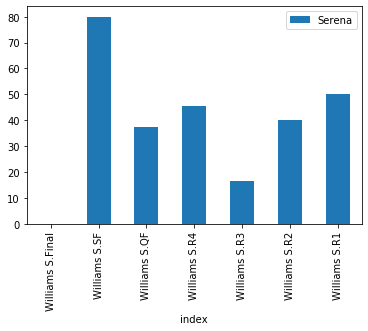

In [0]:
SerenaBPConversiontable.plot(kind='bar', x='index', y='Serena')

In [0]:
SerenafirstreturnpointspercentageTABLE=pd.DataFrame.from_records(Serenafirstreturnpointspercentage)
SerenafirstreturnpointspercentageTABLE=SerenafirstreturnpointspercentageTABLE.T
SerenasecondreturnpointspercentageTABLE=pd.DataFrame.from_records(Serenasecondreturnpointspercentage)
Serenasecondreturnpointspercentage=Serenasecondreturnpointspercentage.T

In [0]:
SerenafirstreturnpointspercentageTABLE.columns=['Serena']
SerenasecondreturnpointspercentageTABLE.columns=['Serena']

In [0]:
SerenafirstreturnpointspercentageTABLE = SerenafirstreturnpointspercentageTABLE.reset_index() 
SerenasecondreturnpointspercentageTABLE = SerenasecondreturnpointspercentageTABLE.reset_index() 

,index,Serena
0,Williams S.Final,18.750000
1,Williams S.SF,48.000000
2,Williams S.QF,41.375000
3,Williams S.R4,44.437500
4,Williams S.R3,17.234375
5,Williams S.R2,39.625000
6,Williams S.R1,47.500000


([<matplotlib.axis.XTick at 0x7f258aa09390>,
 <a list of 7 Text xticklabel objects>)

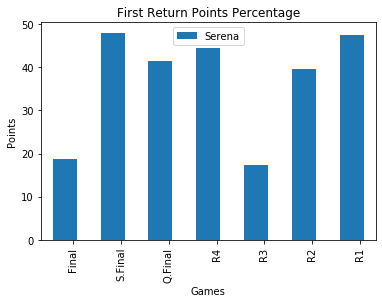

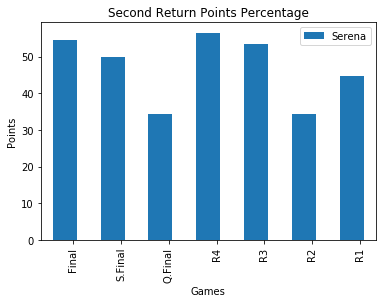

In [0]:
SerenafirstreturnpointspercentageTABLE.plot(kind='bar', x='index', y='Serena')
plt.ylabel('Points')
plt.xlabel('Games')
plt.title('First Return Points Percentage')
plt.xticks(ind + width / 2, ('Final', 'S.Final', 'Q.Final', 'R4', 'R3', 'R2', 'R1'))
SerenasecondreturnpointspercentageTABLE.plot(kind='bar', x='index', y='Serena')
plt.ylabel('Points')
plt.xlabel('Games')
plt.title('Second Return Points Percentage')
plt.xticks(ind + width / 2, ('Final', 'S.Final', 'Q.Final', 'R4', 'R3', 'R2', 'R1'))

In [0]:
SerenaBPTABLE=pd.DataFrame.from_records(SerenaBP)
SerenaBPTABLE=SerenaBPTABLE.T
SerenaopponentBPTABLE=pd.DataFrame.from_records(SerenaopponentBP)
SerenaopponentBPTABLE=SerenaopponentBPTABLE.T

In [0]:
SerenaBPTABLE.columns=['Serena Break Points Won']
SerenaopponentBPTABLE.columns=['Opp Break Points Won']

In [0]:
import matplotlib.pyplot as plt


N = 7

serena_bp = list(SerenaBPTABLE['Serena Break Points Won'])
opp_bp = list(SerenaopponentBPTABLE['Opp Break Points Won'])

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, serena_bp, width, label='Serena')
plt.bar(ind + width, opp_bp, width,
    label='Opp')

plt.ylabel('Points')
plt.title('Break Points Won by Round')

plt.xticks(ind + width / 2, ('Final', 'S.Final', 'Q.Final', 'R4', 'R3', 'R2', 'R1'))
plt.legend(loc='best')
plt.show()

In [0]:
CocofirstreturnpointspercentageTABLE=pd.DataFrame.from_records(Cocofirstreturnpointspercentage)
CocofirstreturnpointspercentageTABLE=CocofirstreturnpointspercentageTABLE.T
CocofirstreturnpointspercentageTABLE.columns=['Coco First Return Point %']
CocosecondreturnpointspercentageTABLE=pd.DataFrame.from_records(Cocosecondreturnpointspercentage)
CocosecondreturnpointspercentageTABLE=CocosecondreturnpointspercentageTABLE.T
CocosecondreturnpointspercentageTABLE.columns=['Coco Second Return Point %']


,Coco First Return Point %
Gauff C. R4,24.25000
Gauff C. R3,28.56250
Gauff C. R2,29.03125
Gauff C. R1,30.56250


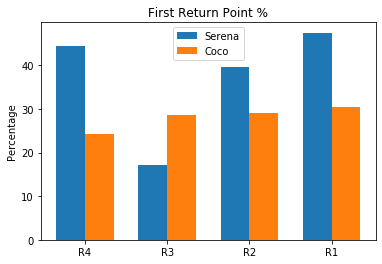

In [0]:
N = 4

serena_1RT = list(SerenafirstreturnpointspercentageTABLE['Serena'])[3:7]
coco_1RT = list(CocofirstreturnpointspercentageTABLE['Coco First Return Point %'])

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, serena_1RT, width, label='Serena')
plt.bar(ind + width, coco_1RT, width,
    label='Coco')

plt.ylabel('Percentage')
plt.title('First Return Point %')

plt.xticks(ind + width / 2, ('R4', 'R3', 'R2', 'R1'))
plt.legend(loc='best')
plt.show()

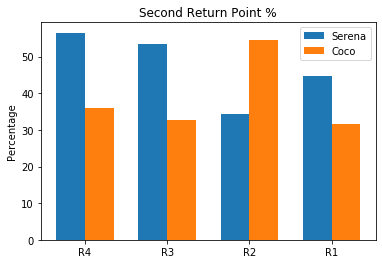

In [0]:
N = 4

serena_2RT = list(SerenasecondreturnpointspercentageTABLE['Serena'])[3:7]
coco_2RT = list(CocosecondreturnpointspercentageTABLE['Coco Second Return Point %'])

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, serena_2RT, width, label='Serena')
plt.bar(ind + width, coco_2RT, width,
    label='Coco')

plt.ylabel('Percentage')
plt.title('Second Return Point %')

plt.xticks(ind + width / 2, ('R4', 'R3', 'R2', 'R1'))
plt.legend(loc='best')
plt.show()

In [0]:
#SerenaWilliamsStats
#CocoGauffStats
SerenaWilliamsStatsTABLE=pd.DataFrame.from_records(SerenaWilliamsStats)
SerenaWilliamsStatsTABLE=SerenaWilliamsStatsTABLE.T
SerenaWilliamsStatsTABLE.columns=['1st Return Points Won','1st Serve Percentage','1st Serve Points Won','2nd Return Points Won','2nd Serve Points Won','Aces','Break Points Saved','Break Points Won','Double Faults','Return Points Won Percentage','Service Games','Service Points Won Percentage','Total 1st Serve Points','Total 2nd Serve Points','Total Points Won Percentage','Unforced Errors','Winners']

CocoGauffStatsTABLE=pd.DataFrame.from_records(CocoGauffStats)
CocoGauffStatsTABLE=CocoGauffStatsTABLE.T
CocoGauffStatsTABLE.columns=['1st Return Points Won','1st Serve Percentage','1st Serve Points Won','2nd Return Points Won','2nd Serve Points Won','Aces','Break Points Saved','Break Points Won','Double Faults','Return Points Won Percentage','Service Games','Service Points Won Percentage','Total 1st Serve Points','Total 2nd Serve Points','Total Points Won Percentage','Unforced Errors','Winners']

,1st Return Points Won,1st Serve Percentage,1st Serve Points Won,2nd Return Points Won,2nd Serve Points Won,Aces,Break Points Saved,Break Points Won,Double Faults,Return Points Won Percentage,Service Games,Service Points Won Percentage,Total 1st Serve Points,Total 2nd Serve Points,Total Points Won Percentage,Unforced Errors,Winners
Williams S.Final,6.0,68.0,19.0,6.0,5.0,2.0,1.0,0.0,1.0,26.0,8.0,55.0,32.0,15.0,42.0,24.0,17.0
Williams S.SF,12.0,61.0,24.0,8.0,9.0,4.0,3.0,4.0,1.0,51.0,8.0,75.0,27.0,17.0,64.0,10.0,28.0
Williams S.QF,24.0,58.0,34.0,12.0,20.0,19.0,0.0,6.0,2.0,45.0,15.0,59.0,53.0,39.0,52.0,27.0,48.0
Williams S.R4,16.0,61.0,21.0,13.0,8.0,2.0,2.0,5.0,0.0,53.0,8.0,66.0,27.0,17.0,58.0,19.0,21.0
Williams S.R3,5.0,71.0,31.0,15.0,12.0,7.0,0.0,1.0,0.0,37.0,10.0,74.0,41.0,17.0,56.0,15.0,19.0
Williams S.R2,21.0,54.0,30.0,10.0,17.0,6.0,0.0,4.0,5.0,41.0,13.0,65.0,39.0,33.0,53.0,26.0,25.0
Williams S.R1,19.0,65.0,25.0,13.0,11.0,7.0,2.0,5.0,2.0,52.0,10.0,65.0,36.0,19.0,58.0,23.0,26.0


In [0]:
serena_hist=SerenaWilliamsStatsTABLE['Double Faults']
coco_hist=CocoGauffStatsTABLE['Double Faults']

In [0]:
x = list(serena_hist)
plt.hist(x, bins='auto',color='#0504aa')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Serena Double Faults Histogram',fontsize=15)
plt.show()

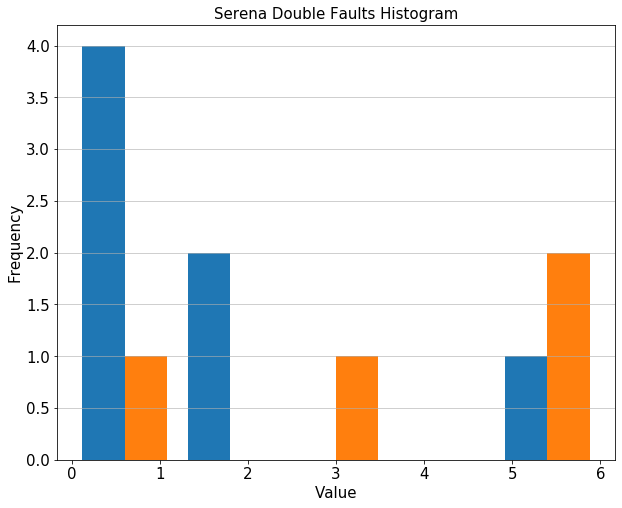

In [0]:
plt.figure(figsize=[10,8])
x = list(serena_hist)
y = list(coco_hist)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Serena Double Faults Histogram',fontsize=15)
n, bins, patches = plt.hist([x, y],bins='auto')


### Data Visualisations Appearance & Evaluation *(15 marks)*

Please evaluate the visualisations used, discussing your visualisation strategy and the means used to create them. Marks in this section will be awarded for the suitability and appearance of visualisations above, though you may choose to repeat them if you would like to comment upon them.
